In [1403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1404]:
df = pd.read_csv('file:///D:/Data%20Science%20&%20AI/Praxis%20Data%20Science/Projects%20Praxis/Machine%20Learning%20Project/laptop-price-predictor-regression-project-main/laptop-price-predictor-regression-project-main/laptop_data.csv')
print('No of instances before removing duplicates :',df.shape)
df.drop_duplicates
print('No of instances after removing duplicates :',df.shape)
df.head()

No of instances before removing duplicates : (1303, 12)
No of instances after removing duplicates : (1303, 12)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Defining Business Problems

# solving the laptop price prediction problem can help address business challenges-


# Pricing Optimization: By accurately predicting laptop prices, businesses can optimize their pricing strategies.

# Market Positioning: Price prediction can assist businesses in positioning their laptops in the market.

# Competitive Analysis: Price prediction can help businesses gain a competitive advantage by understanding the pricing strategies of their competitors.

In [1405]:
#1.Q-What should be the optimal price for a laptop?
#2.Q-What factors influence the pricing of brand laptops?:?
#3-Q-How can accurate laptop price predictions benefit our brand?:

# Identify Features Available In This Dataset

In [1406]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

# Exploratory Data Analysis

In [1407]:
df.describe(include='number')

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [1408]:
df.describe(exclude='number')

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


### Remove useless column

In [1409]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [1410]:
# Removing strings from continous columns
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [1411]:
#Changing Datatype
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

# Univariate Analysis

<Axes: >

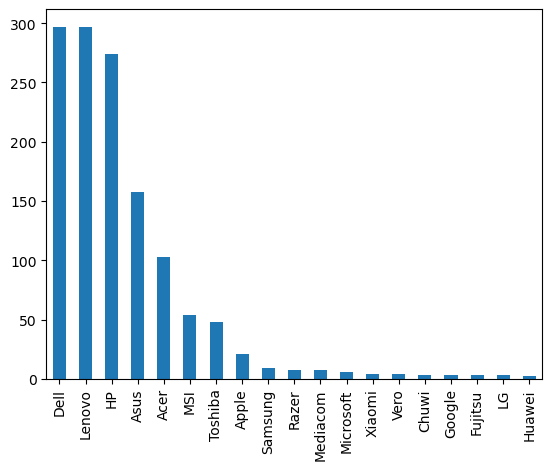

In [1412]:
df['Company'].value_counts().plot(kind='bar')

<Axes: >

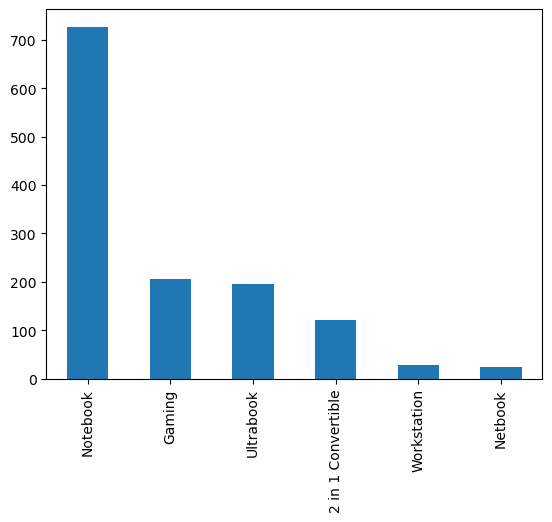

In [1413]:
df['TypeName'].value_counts().plot(kind='bar')

<Axes: >

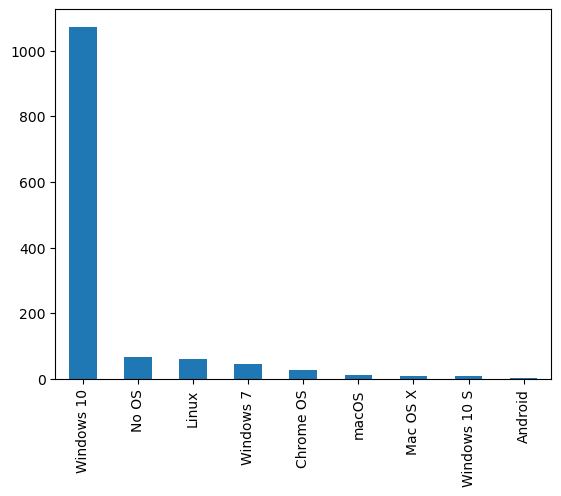

In [1414]:
df['OpSys'].value_counts().plot(kind='bar')

<Axes: >

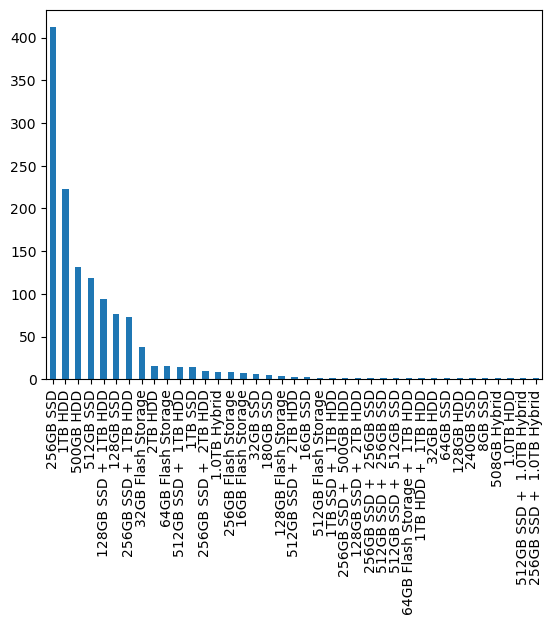

In [1415]:
df['Memory'].value_counts().plot(kind='bar')

# Bivariate Analysis

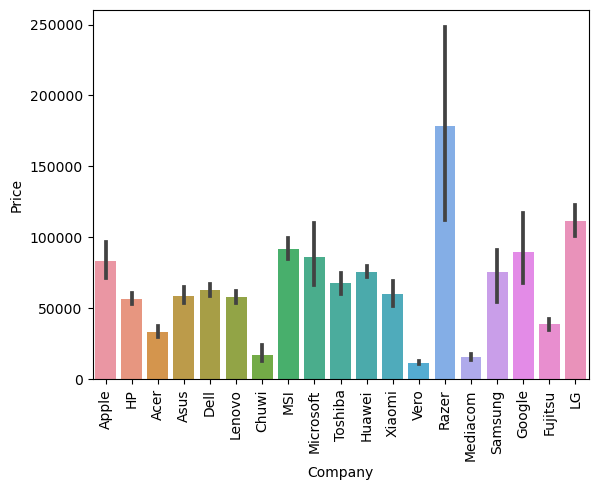

In [1416]:
import seaborn as sns
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Q.Which Type of laptop model is costliest

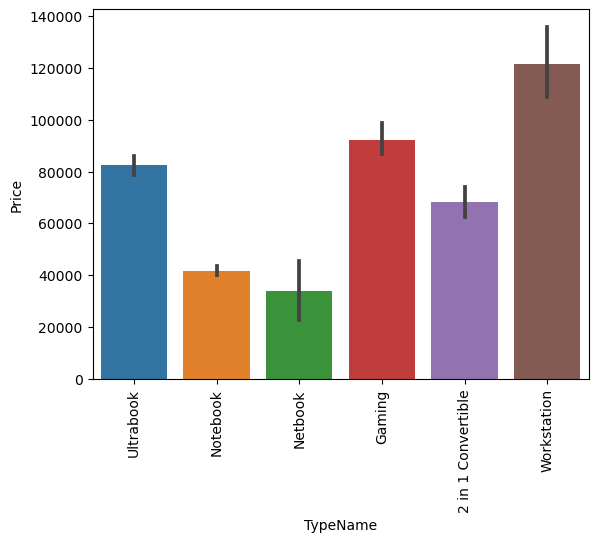

In [1417]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

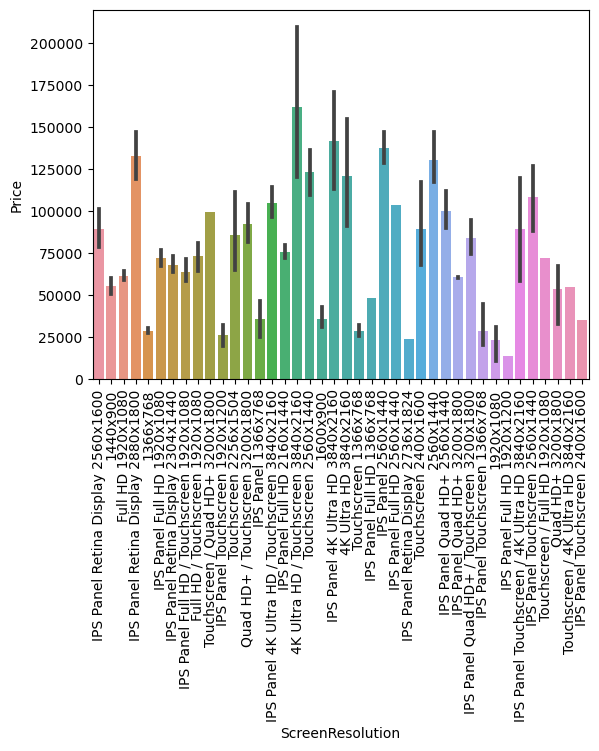

In [1418]:
sns.barplot(x=df['ScreenResolution'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1419]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen', ylabel='Price'>

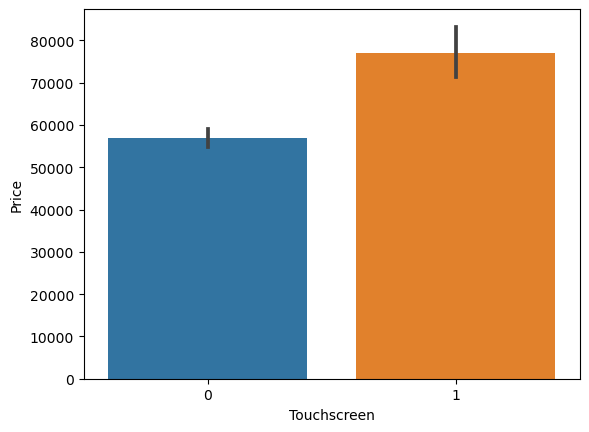

In [1420]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [1421]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

## Q.Does Display Quality matter to influence the price?

<Axes: xlabel='Ips', ylabel='Price'>

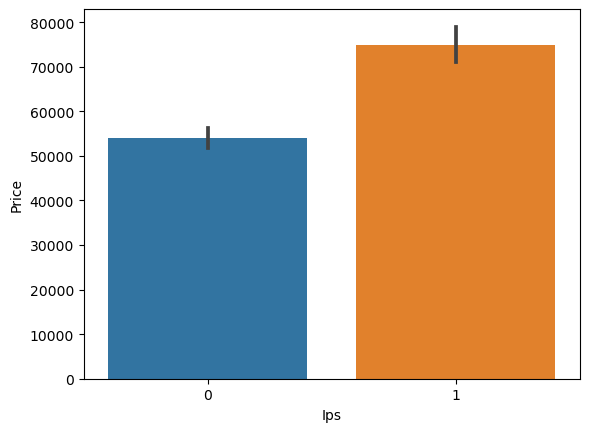

In [1422]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [1423]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [1424]:
##Removing strings
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [1425]:
#Converting datatype after removing string
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [1426]:
#create new variable
df['pixel_per_inch'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [1427]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [1428]:
##Removing strings
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [1429]:
def fetch_processor(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return text
    elif text.startswith('Intel'):
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'


In [1430]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

## Q.Which Cpu brand is costly

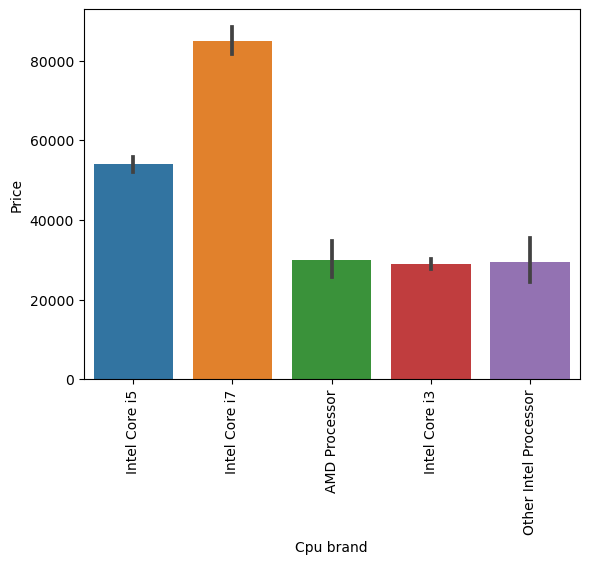

In [1431]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1432]:
#Costilest cpu is i7

In [1433]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

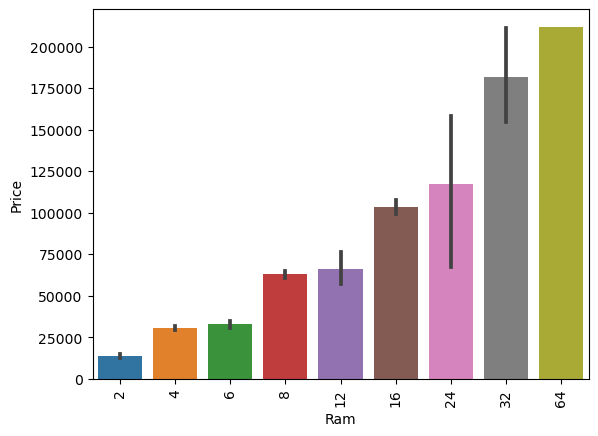

In [1434]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1435]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

In [1436]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["second"]= new[1]
df["second"]=df["second"].str.strip()

In [1437]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [1438]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)

The default value of regex will change from True to False in a future version.


In [1439]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [1440]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)
df['second'] = df['second'].str.replace(r'\D', '')
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

The default value of regex will change from True to False in a future version.
The default value of regex will change from True to False in a future version.


In [1441]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [1442]:
df.drop(columns=['Memory'],inplace=True)

In [1443]:
#df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [1444]:
#All widnows in windows category and mac in one category rest is others
def cat_os(inp):
    os_mapping = {
        'Windows 10': 'Windows',
        'Windows 7': 'Windows',
        'Windows 10 S': 'Windows',
        'macOS': 'Mac',
        'Mac OS X': 'Mac'
    }
    return os_mapping.get(inp, 'Others/No OS/Linux')

In [1445]:
df['os'] = df['OpSys'].apply(cat_os)

In [1446]:
df.drop(columns=['OpSys'],inplace=True)

## Q.Which os laptops are most costly

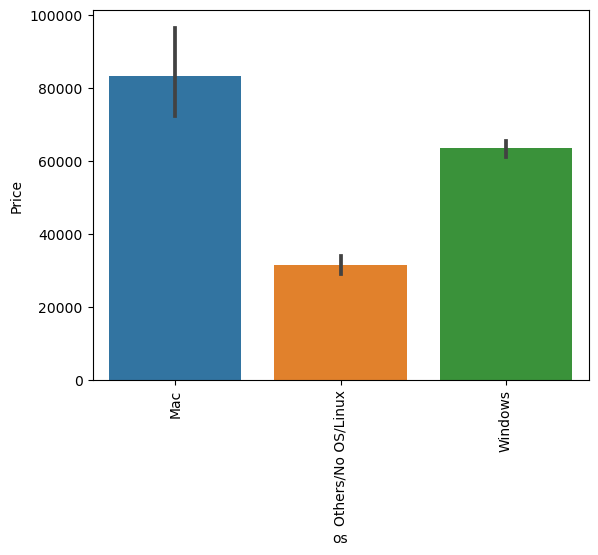

In [1447]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [1448]:
df.dtypes

Company            object
TypeName           object
Inches            float64
Ram                 int32
Gpu                object
Weight            float32
Price             float64
Touchscreen         int64
Ips                 int64
X_res               int32
Y_res               int32
pixel_per_inch    float64
Cpu brand          object
os                 object
dtype: object

In [1449]:
cont_col1=list(df[df.dtypes[df.dtypes=='int32'].index].columns)
cont_col2=list(df[df.dtypes[df.dtypes=='float64'].index].columns)
cont_col3=list(df[df.dtypes[df.dtypes=='int64'].index].columns)
cont_col4=list(df[df.dtypes[df.dtypes=='float32'].index].columns)
all_cont=cont_col1+cont_col2+cont_col3+cont_col4

In [1450]:
all_cont

['Ram',
 'X_res',
 'Y_res',
 'Inches',
 'Price',
 'pixel_per_inch',
 'Touchscreen',
 'Ips',
 'Weight']



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

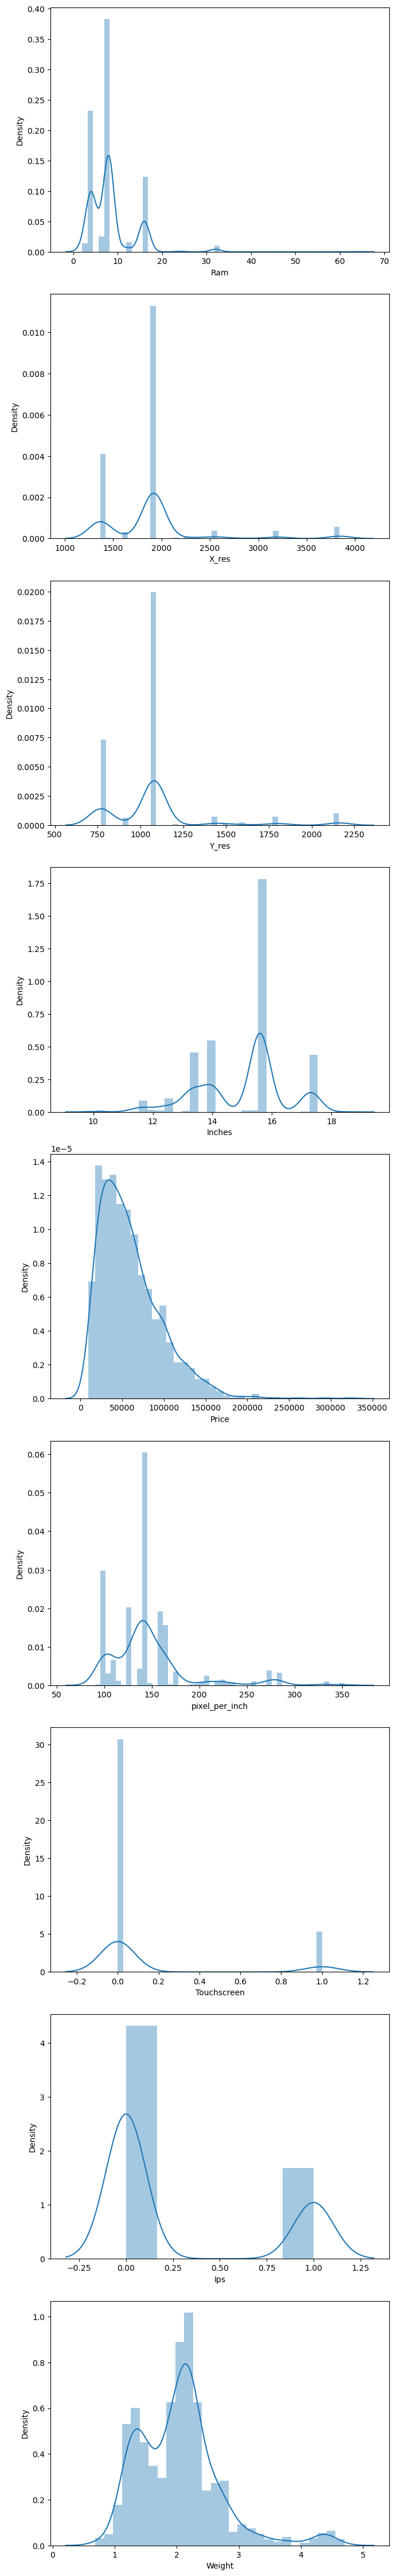

In [1451]:
fig, axes = plt.subplots(len(all_cont), 1, figsize=(7, 5*len(all_cont)))

for i, col in enumerate(all_cont):
    sns.distplot(df[col], ax=axes[i])

plt.tight_layout()
plt.show()

# Checking Missing values

In [1452]:
df.isnull().sum()

Company           0
TypeName          0
Inches            0
Ram               0
Gpu               0
Weight            0
Price             0
Touchscreen       0
Ips               0
X_res             0
Y_res             0
pixel_per_inch    0
Cpu brand         0
os                0
dtype: int64

In [1453]:
#nothing found

# Outlier Checking and Treatment

In [1454]:
all_cont

['Ram',
 'X_res',
 'Y_res',
 'Inches',
 'Price',
 'pixel_per_inch',
 'Touchscreen',
 'Ips',
 'Weight']

<Axes: >

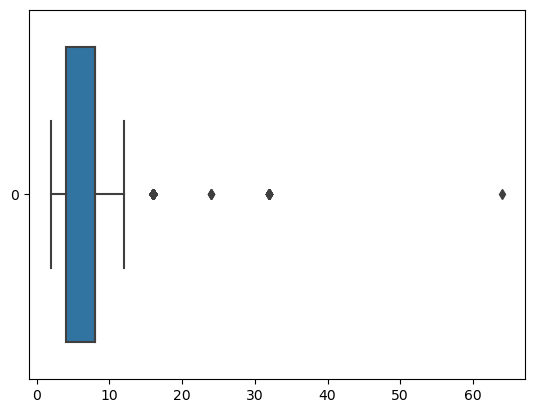

In [1455]:
sns.boxplot(data=df['Ram'],orient='hue')

<Axes: >

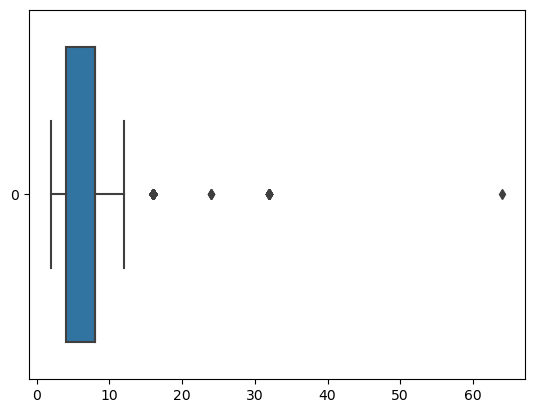

In [1456]:
sns.boxplot(data=df['Ram'],orient='hue')

In [1457]:
def outlier_findings(inpdata):
    quantile1, quantile3= np.percentile(inpdata,[25,75])
    print('Quartile 1 :',quantile1,'Quartile 3 :',quantile3)
    iqr_value=quantile3-quantile1
    
    print("Inter Quartile Range :",iqr_value)
    lower_bound_val = quantile1 -(1.5 * iqr_value) 
    upper_bound_val = quantile3 +(1.5 * iqr_value) 
    
    print("Min Whisker :",lower_bound_val,"Max Whiker :",upper_bound_val)
    lower_outliers = np.where(inpdata < lower_bound_val)
    upper_outliers = np.where(inpdata > upper_bound_val)
    
    print("Number of values below the lower bound:", len(lower_outliers[0]))
    print("Number of values above the upper bound:", len(upper_outliers[0]))

In [1458]:
outlier_findings(inpdata=df['Ram'])

Quartile 1 : 4.0 Quartile 3 : 8.0
Inter Quartile Range : 4.0
Min Whisker : -2.0 Max Whiker : 14.0
Number of values below the lower bound: 0
Number of values above the upper bound: 221


In [1459]:
outlier_findings(inpdata=df['Inches'])

Quartile 1 : 14.0 Quartile 3 : 15.6
Inter Quartile Range : 1.5999999999999996
Min Whisker : 11.600000000000001 Max Whiker : 18.0
Number of values below the lower bound: 38
Number of values above the upper bound: 1


In [1460]:
outlier_findings(inpdata=df['Weight'])

Quartile 1 : 1.5 Quartile 3 : 2.299999952316284
Inter Quartile Range : 0.7999999523162842
Min Whisker : 0.30000007152557373 Max Whiker : 3.4999998807907104
Number of values below the lower bound: 0
Number of values above the upper bound: 46


### Treating outliers with winsorization technique

In [1461]:
for i in all_cont:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[i] = np.where(df[i] > upper_bound, upper_bound,np.where(df[i] < lower_bound,lower_bound,df[i]))

In [1462]:
outlier_findings(inpdata=df['Ram'])

Quartile 1 : 4.0 Quartile 3 : 8.0
Inter Quartile Range : 4.0
Min Whisker : -2.0 Max Whiker : 14.0
Number of values below the lower bound: 0
Number of values above the upper bound: 0


In [1463]:
#df.columns

In [1464]:
# df['Weight']=np.sqrt(df['Weight'])
# df['Ips']=np.sqrt(df['Ips'])

In [1465]:
df['Touchscreen'].unique()

array([0.])

In [1466]:
df.drop(['Touchscreen'],inplace=True,axis=1)

# Checking Correlation

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<function matplotlib.pyplot.show(close=None, block=None)>

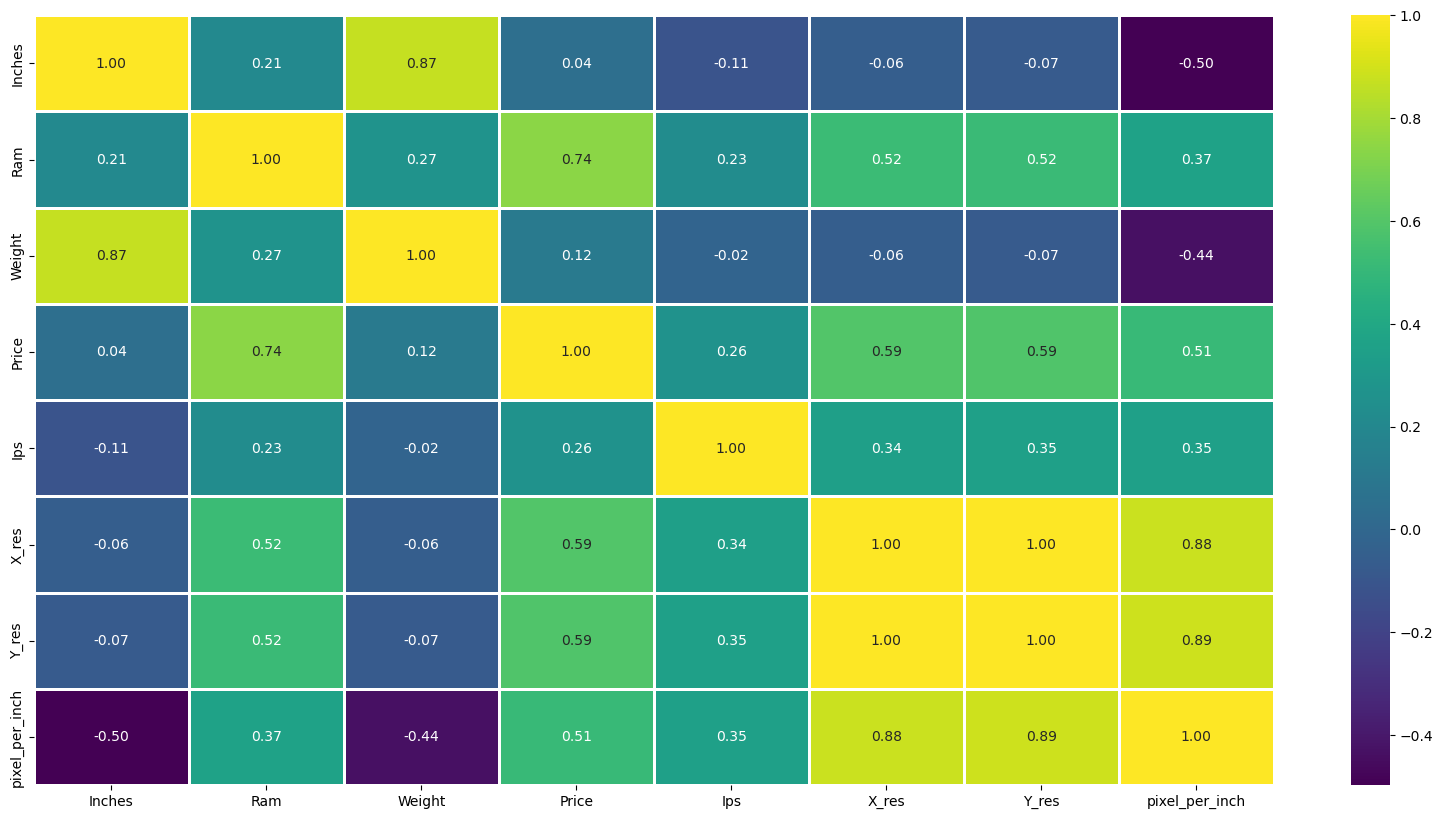

In [1467]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), linewidths=1.0, annot=True, fmt=".2f", cmap='viridis')
plt.show

In [1468]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Gpu', 'Weight', 'Price', 'Ips',
       'X_res', 'Y_res', 'pixel_per_inch', 'Cpu brand', 'os'],
      dtype='object')

In [1469]:
df.dtypes

Company            object
TypeName           object
Inches            float64
Ram               float64
Gpu                object
Weight            float32
Price             float64
Ips               float64
X_res             float64
Y_res             float64
pixel_per_inch    float64
Cpu brand          object
os                 object
dtype: object

In [1470]:
df.drop(['X_res','Y_res'],inplace=True,axis=1)

In [1471]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df[[ 'Inches', 'Ram','Weight',
        'Ips', 'pixel_per_inch']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature        VIF
0          Inches  94.847640
1             Ram   9.172096
2          Weight  41.896392
3             Ips   1.635711
4  pixel_per_inch  34.223635


In [1472]:
from statsmodels.multivariate.factor_rotation import rotate_factors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Inches', 'Ram', 'Weight','Ips', 'pixel_per_inch']])

pca = PCA(n_components=2)
pca.fit(df_scaled)

principal_components = pca.components_

rotated_components = rotate_factors(principal_components, method='varimax')
print("Rotated Components:")
print(rotated_components)

pca_scores = pca.transform(df_scaled)

print("PCA Scores:")
print(pca_scores)

print("PCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Rotated Components:
(array([[-1.00000000e+00,  2.01967404e-09, -1.03298099e-12,
        -2.62290190e-15,  1.87072580e-14],
       [ 2.01967412e-09,  1.00000000e+00,  5.54244151e-16,
        -3.60822483e-16, -5.55111512e-17]]), array([[ 0.61610498,  0.17179205, -0.68932855,  0.09625079,  0.32628832],
       [ 0.05581322,  0.68460848, -0.07384519, -0.56071867, -0.45644012],
       [ 0.59647958,  0.25324522,  0.71945142,  0.08148214,  0.23628221],
       [-0.18324266,  0.50879237, -0.03896946,  0.80477401, -0.2416043 ],
       [-0.4774241 ,  0.42284266,  0.0156227 , -0.14842448,  0.75564305]]))
PCA Scores:
[[ 2.71120947  1.27604642]
 [ 1.08500019 -0.97558053]
 [-0.21860159 -0.27208292]
 ...
 [ 0.45241193 -2.25550322]
 [-1.20068754 -1.13409281]
 [-1.17816244 -1.53005392]]
PCA Explained Variance Ratio:
[0.45519534 0.30911683]


In [1473]:
b=pd.DataFrame(pca_scores,columns=['PCA1','PCA2'])

In [1474]:
b.head()

,PCA1,PCA2
0,2.711209,1.276046
1,1.085000,-0.975581
2,-0.218602,-0.272083
3,1.231470,2.929855
4,2.711209,1.276046


In [1475]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Gpu', 'Weight', 'Price', 'Ips',
       'pixel_per_inch', 'Cpu brand', 'os'],
      dtype='object')

In [1476]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Gpu', 'Weight', 'Price', 'Ips',
       'pixel_per_inch', 'Cpu brand', 'os'],
      dtype='object')

In [1477]:
df_new= pd.concat([df,b], axis=1)

In [1478]:
df_new.head()

,Company,TypeName,Inches,Ram,Gpu,Weight,Price,Ips,pixel_per_inch,Cpu brand,os,PCA1,PCA2
0,Apple,Ultrabook,13.3,8.0,Intel Iris Plus Graphics 640,1.37,71378.6832,1.0,202.372769,Intel Core i5,Mac,2.711209,1.276046
1,Apple,Ultrabook,13.3,8.0,Intel HD Graphics 6000,1.34,47895.5232,0.0,127.677940,Intel Core i5,Mac,1.085000,-0.975581
2,HP,Notebook,15.6,8.0,Intel HD Graphics 620,1.86,30636.0000,0.0,141.211998,Intel Core i5,Others/No OS/Linux,-0.218602,-0.272083
3,Apple,Ultrabook,15.4,14.0,AMD Radeon Pro 455,1.83,135195.3360,1.0,202.372769,Intel Core i7,Mac,1.231470,2.929855
4,Apple,Ultrabook,13.3,8.0,Intel Iris Plus Graphics 650,1.37,96095.8080,1.0,202.372769,Intel Core i5,Mac,2.711209,1.276046


In [1479]:
#df_new.drop(['Company','TypeName','Gpu','Cpu brand','os'],inplace=True,axis=1)

In [1480]:
df_new.corr()[['PCA1','PCA2']]

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,PCA1,PCA2
Inches,-9.294770e-01,2.135745e-01
Ram,-8.420172e-02,8.511157e-01
Weight,-8.998694e-01,3.148383e-01
Price,1.031549e-01,7.190713e-01
Ips,2.764461e-01,6.325384e-01
pixel_per_inch,7.202582e-01,5.256844e-01
PCA1,1.000000e+00,-2.076117e-16
PCA2,-2.076117e-16,1.000000e+00


In [1481]:
df_new.head()

,Company,TypeName,Inches,Ram,Gpu,Weight,Price,Ips,pixel_per_inch,Cpu brand,os,PCA1,PCA2
0,Apple,Ultrabook,13.3,8.0,Intel Iris Plus Graphics 640,1.37,71378.6832,1.0,202.372769,Intel Core i5,Mac,2.711209,1.276046
1,Apple,Ultrabook,13.3,8.0,Intel HD Graphics 6000,1.34,47895.5232,0.0,127.677940,Intel Core i5,Mac,1.085000,-0.975581
2,HP,Notebook,15.6,8.0,Intel HD Graphics 620,1.86,30636.0000,0.0,141.211998,Intel Core i5,Others/No OS/Linux,-0.218602,-0.272083
3,Apple,Ultrabook,15.4,14.0,AMD Radeon Pro 455,1.83,135195.3360,1.0,202.372769,Intel Core i7,Mac,1.231470,2.929855
4,Apple,Ultrabook,13.3,8.0,Intel Iris Plus Graphics 650,1.37,96095.8080,1.0,202.372769,Intel Core i5,Mac,2.711209,1.276046


In [1482]:
df_new.drop(['Inches', 'Ram', 'Weight','Ips', 'pixel_per_inch'],inplace=True,axis=1)

In [1483]:
df_new.columns

Index(['Company', 'TypeName', 'Gpu', 'Price', 'Cpu brand', 'os', 'PCA1',
       'PCA2'],
      dtype='object')

In [1484]:
#No values found beyond 10 hence we can proceed further.

# Spliting Data

In [1485]:
df_dummies=pd.get_dummies(df_new,drop_first=True)

In [1486]:
X1 = df_dummies.drop(columns=['Price'])
y1 = np.log(df_dummies['Price'])

In [1487]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.15,random_state=2)

In [1488]:
X.columns

Index(['Inches', 'Ram', 'Weight', 'Ips', 'pixel_per_inch'], dtype='object')

# Feature Selection

In [1489]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# rfe = RFECV(estimator=model,cv=5,step=1)
# rfe.fit(X, y)
# selected_features = np.where(rfe.support_)[0]
# print("Selected feature indices:", selected_features.tolist())

In [1490]:
# column_names = df_dummies.columns.tolist()
# index_numbers = selected_features 
# selected_columns = [column_names[i] for i in index_numbers]
# print("Selected columns:", selected_columns)

In [1491]:
# After doing feature selection performance of models get reduced so we will perform with all the features.

# Statistical Model-OLS

In [1492]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
p_values = results.pvalues
selected_features = X_train.columns[p_values <= 0.05]
X_train_filtered = X_train[selected_features]
model_filtered = sm.OLS(y_train, X_train_filtered)
results_filtered = model_filtered.fit()
print(results_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     118.4
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:32:00   Log-Likelihood:                 42.395
No. Observations:                1107   AIC:                             23.21
Df Residuals:                    1053   BIC:                             293.7
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [1516]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(results.resid, results.model.exog)
test_statistic = bp_test[0]
p_value = bp_test[1]

print("Breusch-Pagan Test:")
print("Test statistic:", test_statistic)
print("p-value:", p_value)

Breusch-Pagan Test:
Test statistic: 274.6290267599243
p-value: 8.538003272178427e-11


In [1518]:
#Hetaroscedasticity present in this.we cant treat this So we can look for other regression model.
#Durbin Watson- Value almost close to 2 but there is some presence of autocorrelation.
#Omnibus-Overall data is normall distributed as from the p value we have to reject null hypothesis.data significantly deviates from a normal distribution
#Jarque-Bera-where h0 is the skewness and kurtosis is behaving normal.but h0 couldnt get support means this model deviates from normal distribution.
#Skewness-positively skewd.
#Kurtosis-Data is concentrated more heavily around the mean.As the pekdness is high.
#Annova-Atleast one pair of group have significant difference in mean laptop price,so f statistics standout. 

In [1493]:
from sklearn.metrics import mean_squared_error, r2_score
X_test = sm.add_constant(X_test)
X_test_filtered = X_test[selected_features]
y_pred_test = results_filtered.predict(X_test_filtered)
r2_test = r2_score(y_test, y_pred_test)
print("Test Set - R-squared (R2):", r2_test)
mse_test = mean_squared_error(y_test, y_pred_test)
Rmse_test=np.sqrt(mse_test)
print('Test RMSE:',Rmse_test)

Test Set - R-squared (R2): 0.8412275006916733
Test RMSE: 0.24574155236953427


In [1372]:
error=y_pred_test-y_test

<Axes: ylabel='Count'>

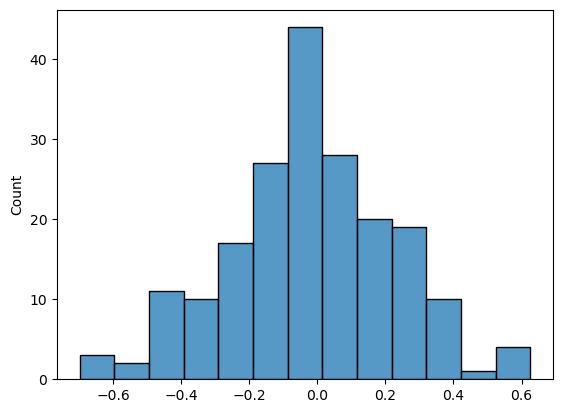

In [1374]:
sns.histplot(data=error)

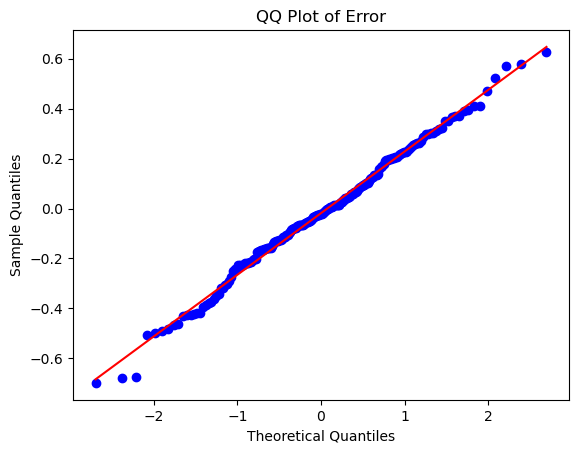

In [1375]:
import scipy.stats as stats
stats.probplot(error, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of Error")
plt.show()

In [1376]:
#One of the assumption of ols is satisfied errors are normally distributed

In [ ]:
#X_train_filtered

# Random Forest

In [1494]:
df_dummies11=pd.get_dummies(df,drop_first=True)

In [1495]:
X2 = df_dummies11.drop(columns=['Price'])
y2 = np.log(df_dummies11['Price'])

In [1496]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.15,random_state=2)

In [1497]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

rf_model = RandomForestRegressor(n_estimators=500,max_depth=15,min_samples_leaf=1,min_samples_split=5)

rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train=np.sqrt(mae_train)
mse_test = mean_squared_error(y_test, y_pred_test)
Rmse_test=np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - RMSE:", Rmse_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - RMSE:",Rmse_test )
print("Test Set - R-squared (R2):", r2_test)

Train Set - RMSE: 0.11648732280264644
Train Set - R-squared (R2): 0.9684252335739547
Test Set - RMSE: 0.20432773644683144
Test Set - R-squared (R2): 0.8902327625756483


# Feature Importance

Feature ranking:
1. Feature 1: 0.5850305618892465
2. Feature 4: 0.06489286634275183
3. Feature 140: 0.0648223585058406
4. Feature 2: 0.061194472780222824
5. Feature 25: 0.042008576897598286
6. Feature 0: 0.03073448042757497
7. Feature 138: 0.023055954942189014
8. Feature 139: 0.01343537413538521
9. Feature 27: 0.01151494915027635
10. Feature 142: 0.00682248801607363


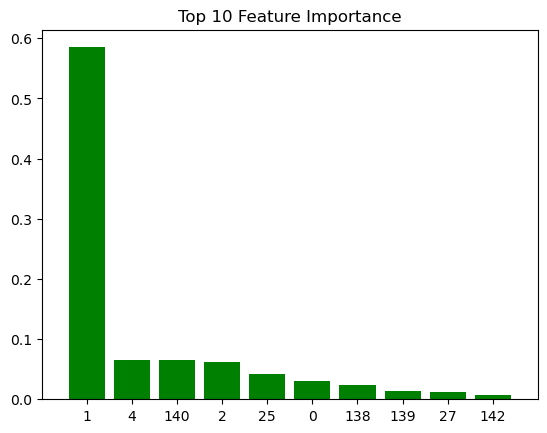

In [1498]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]}")
    
import matplotlib.pyplot as plt

plt.figure()
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], color="g", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

In [1499]:
column_names = df_dummies1.columns.tolist()
index_numbers = [1,140,2,4,25,138,139,27,141]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['Ram' 'Cpu brand_Intel Core i7' 'Weight' 'Ips' 'TypeName_Netbook'
 'Cpu brand_Intel Core i3' 'Cpu brand_Intel Core i5' 'TypeName_Ultrabook'
 'Cpu brand_Other Intel Processor']


# Optuna Performing

In [247]:
import optuna
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    regressor = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test=np.sqrt(mse_test)
    return rmse_test
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)

[I 2023-06-25 05:58:13,893] A new study created in memory with name: no-name-26feedad-a19c-4e39-aad4-961f412772be
[I 2023-06-25 05:58:14,965] Trial 0 finished with value: 0.22993630470435872 and parameters: {'n_estimators': 200, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.22993630470435872.
[I 2023-06-25 05:58:17,048] Trial 1 finished with value: 0.24021604850981781 and parameters: {'n_estimators': 400, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.22993630470435872.
[I 2023-06-25 05:58:21,865] Trial 2 finished with value: 0.22031206631562733 and parameters: {'n_estimators': 800, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.22031206631562733.
[I 2023-06-25 05:58:26,599] Trial 3 finished with value: 0.23936015151581455 and parameters: {'n_estimators': 1000, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 2 wit

Best Parameters:  {'n_estimators': 200, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 1}
Best Value:  0.2181919711876539


In [248]:
#!pip install shap

# Explanaible AI Framework SHAP

In [1508]:
import shap
explainer = shap.Explainer(rf_model)
shap_values1 = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


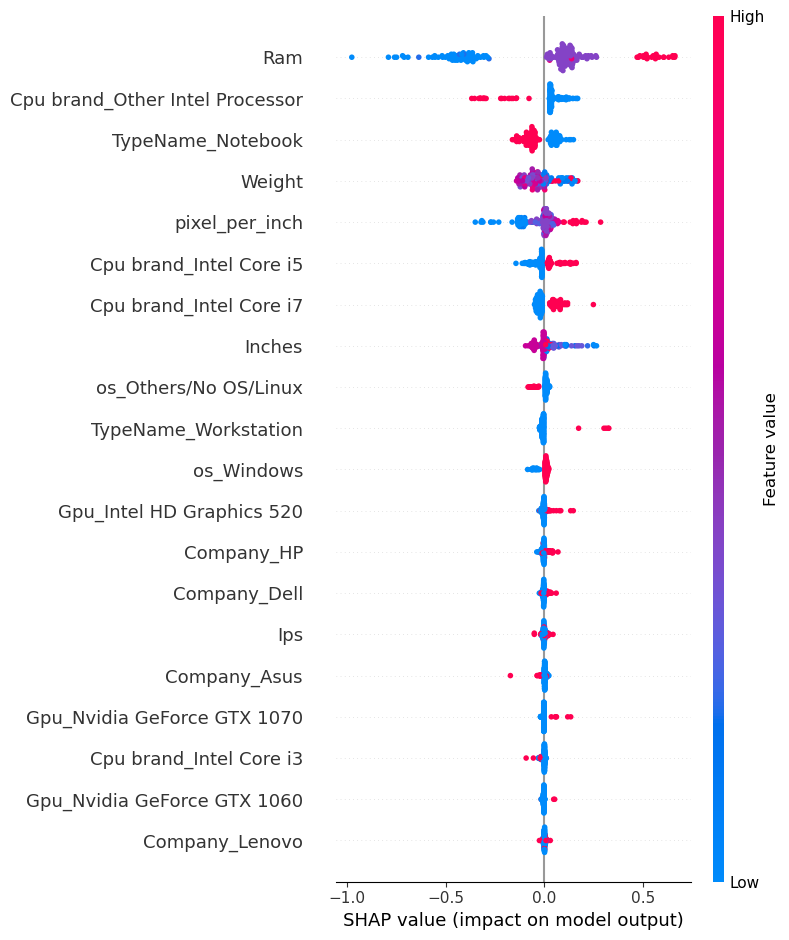

In [1509]:
shap.summary_plot(shap_values1, X_test)

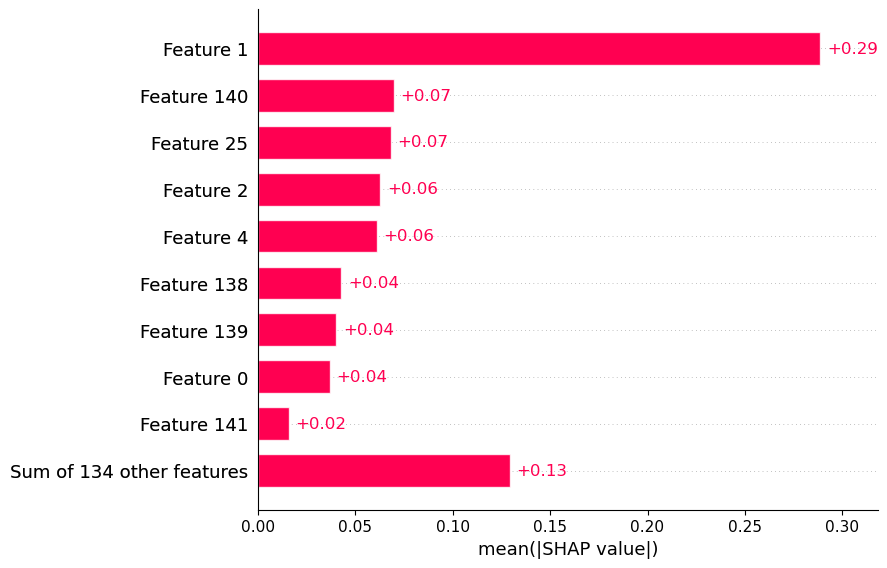

In [1510]:
explanation = shap.Explanation(shap_values1)
shap.plots.bar(explanation)

In [1511]:
column_names = df_dummies1.columns.tolist()
index_numbers = [1,25,140,2,4,138,139]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['Ram' 'TypeName_Netbook' 'Cpu brand_Intel Core i7' 'Weight' 'Ips'
 'Cpu brand_Intel Core i3' 'Cpu brand_Intel Core i5']


#Higher the Ram,cpu brand,Notebbok type value higher will be the laptop price,also from beeswarm chart we can see that the the most influencing factor is Ram,higher the Ram value more the laptop price will be.

#increase the laptop value.While the other brands of cpu intel brans negatively impact on laptop price,people love to pay only for i5 or i7.

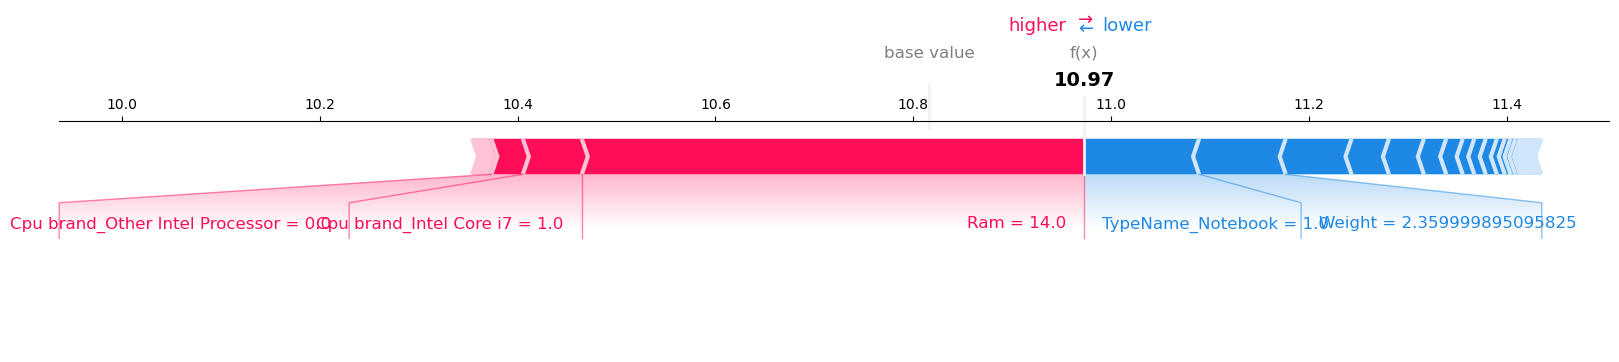

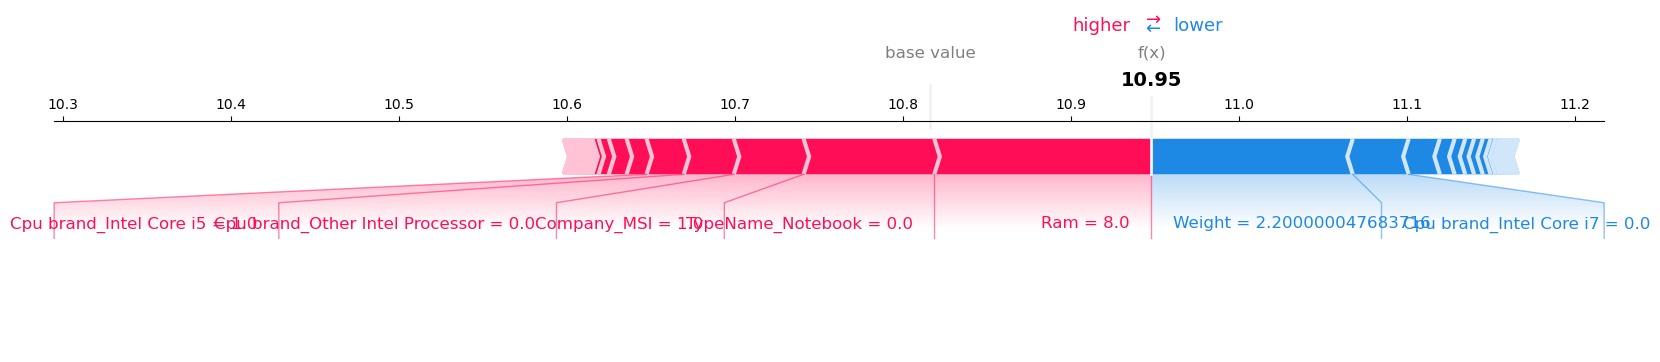

In [1103]:
instance_index = [15, 89]
for i in instance_index:
    base_value = explainer.expected_value
    shap_values_instance = shap_values1[i]
    shap.force_plot(base_value, shap_values_instance, X_test.iloc[i], matplotlib=True)

In [330]:
#For one instances we can see from the force plot cpu brand i7,cpu brand intel processor has the higher impact on predicting the laptop price.
#TypeName_Notebook,weight lower effect on predicting price

# Decision Tree

In [251]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

DTR_model = DecisionTreeRegressor(max_depth=12,min_samples_leaf=2,min_samples_split=15)

DTR_model.fit(X_train, y_train)

y_pred_train = DTR_model.predict(X_train)
y_pred_test = DTR_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train=np.sqrt(mae_train)
mse_test = mean_squared_error(y_test, y_pred_test)
Rmse_test=np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - RMSE:", Rmse_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - RMSE:",Rmse_test )
print("Test Set - R-squared (R2):", r2_test)


Train Set - MAE: 0.03285434078644059
Train Set - R-squared (R2): 0.912940659445745
Test Set - MAE: 0.18818001718658725
Test Set - R-squared (R2): 0.8446576612913256


In [252]:
import optuna
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 5, 18)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    regressor = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test=np.sqrt(mse_test)
    return rmse_test
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)

[I 2023-06-25 05:59:16,803] A new study created in memory with name: no-name-896e8e30-8f5c-410b-92c4-1bbf87a60afe
[I 2023-06-25 05:59:16,822] Trial 0 finished with value: 0.263268014051021 and parameters: {'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.263268014051021.
[I 2023-06-25 05:59:16,839] Trial 1 finished with value: 0.2608346240235163 and parameters: {'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.2608346240235163.
[I 2023-06-25 05:59:16,855] Trial 2 finished with value: 0.2847779218257459 and parameters: {'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.2608346240235163.
[I 2023-06-25 05:59:16,869] Trial 3 finished with value: 0.2772783276075703 and parameters: {'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.2608346240235163.
[I 2023-06-25 05:59:16,883] Trial 4 finished with value: 0.27663

Best Parameters:  {'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 2}
Best Value:  0.23728817219001047


Feature ranking:
1. Feature 139: 0.3624059287391125
2. Feature 138: 0.1889772154545417
3. Feature 1: 0.10549503193250398
4. Feature 4: 0.08712991781978824
5. Feature 25: 0.04943164980395585
6. Feature 140: 0.02522614758674925
7. Feature 27: 0.022778962174055662
8. Feature 142: 0.01852222019283522
9. Feature 64: 0.01130553631638643
10. Feature 106: 0.009757747486073323


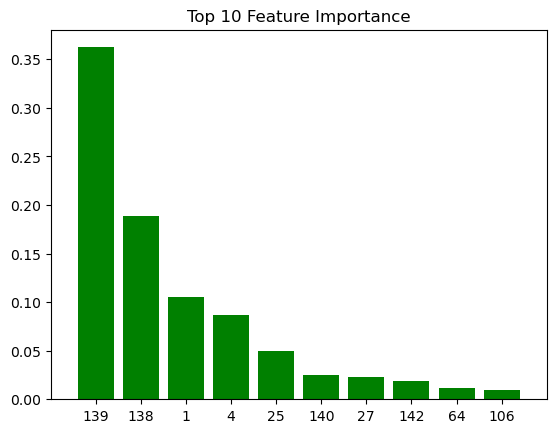

In [253]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]}")
    
import matplotlib.pyplot as plt

plt.figure()
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], color="g", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

In [254]:
column_names = df_dummies.columns.tolist()
index_numbers = [139,138,4,25,140,27,141,64,106]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['Cpu brand_Intel Core i7' 'Cpu brand_Intel Core i5' 'pixel_per_inch'
 'TypeName_Notebook' 'Cpu brand_Other Intel Processor'
 'TypeName_Workstation' 'os_Others/No OS/Linux' 'Gpu_AMD Radeon RX 580'
 'Gpu_Nvidia GeForce GTX 1060']


# GBM

In [1500]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

GBM_model = GradientBoostingRegressor(n_estimators=700, learning_rate=0.14)

GBM_model.fit(X_train, y_train)

y_pred_train = GBM_model.predict(X_train)
y_pred_test = GBM_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train=np.sqrt(mae_train)
mse_test = mean_squared_error(y_test, y_pred_test)
Rmse_test=np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train Set - RMSE:", Rmse_train)
print("Train Set - R-squared (R2):", r2_train)
print("Test Set - RMSE:",Rmse_test )
print("Test Set - R-squared (R2):", r2_test)


Train Set - RMSE: 0.11648732280264644
Train Set - R-squared (R2): 0.9329841087844736
Test Set - RMSE: 0.20887238371811107
Test Set - R-squared (R2): 0.8852955854630433


In [1506]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.2)
    
    regressor = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)


[I 2023-06-30 22:36:55,684] A new study created in memory with name: no-name-6ff7b9fa-0174-43b2-9b3b-4c47b5788d5b
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-06-30 22:36:58,043] Trial 0 finished with value: 0.04994055308353858 and parameters: {'n_estimators': 400, 'learning_rate': 0.02972851401613648}. Best is trial 0 with value: 0.04994055308353858.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-06-30 22:36:58,636] Trial 1 finished with value: 0.05127444531092087 and parameters: {'n_estimators': 100, 'learning_rate': 0.09768235182823007}. Best is trial 0 with value: 0.04994055308353858.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

Best Parameters:  {'n_estimators': 700, 'learning_rate': 0.14556240335917378}
Best Value:  0.0342230399479143


In [260]:
X_test.columns

Index(['const', 'Weight', 'Touchscreen', 'Ips', 'pixel_per_inch',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu',
       ...
       'Gpu_Nvidia Quadro M500M', 'Gpu_Nvidia Quadro M520M',
       'Gpu_Nvidia Quadro M620', 'Gpu_Nvidia Quadro M620M',
       'Cpu brand_Intel Core i3', 'Cpu brand_Intel Core i5',
       'Cpu brand_Intel Core i7', 'Cpu brand_Other Intel Processor',
       'os_Others/No OS/Linux', 'os_Windows'],
      dtype='object', length=143)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


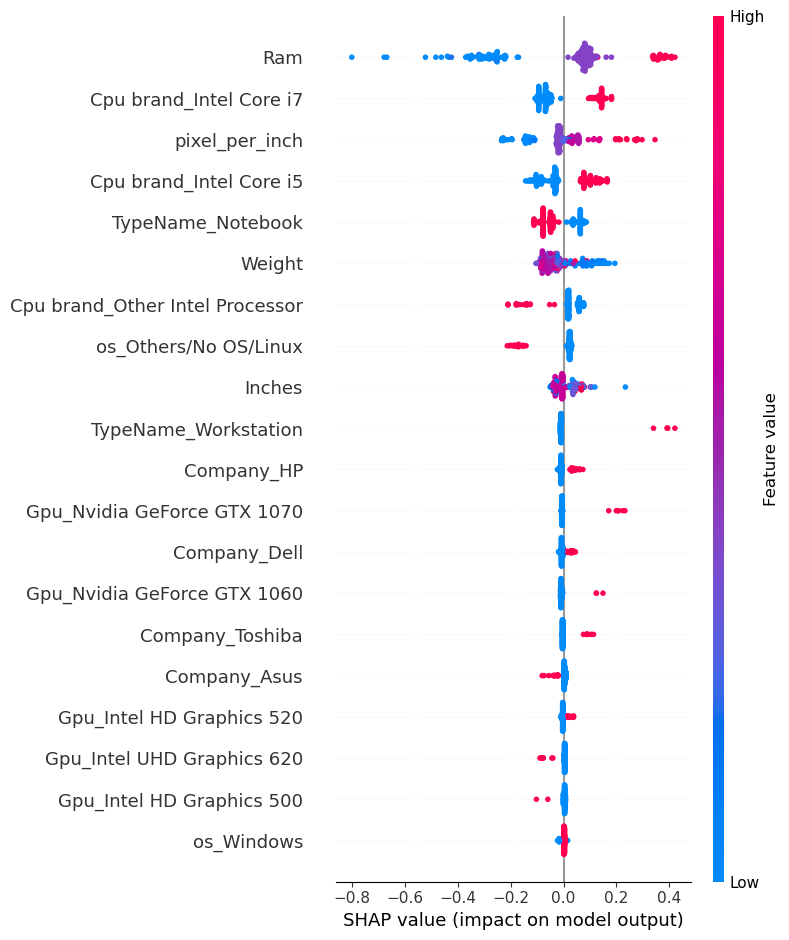

In [1501]:
explainer = shap.Explainer(GBM_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

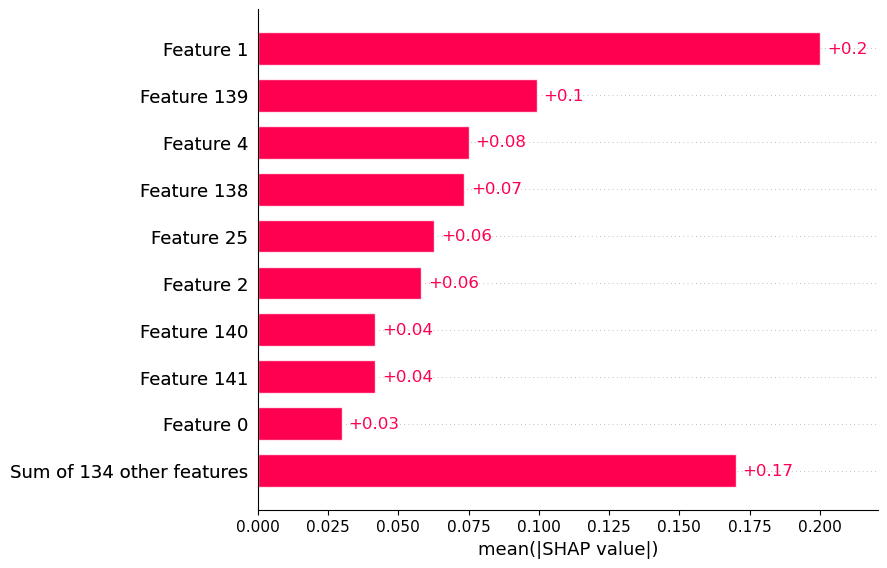

In [1503]:
explanation = shap.Explanation(shap_values)
shap.plots.bar(explanation)

In [1127]:
column_names = df_dummies1.columns.tolist()
index_numbers = [1,25,138,139,4]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['Ram' 'TypeName_Netbook' 'Cpu brand_Intel Core i3'
 'Cpu brand_Intel Core i5' 'Ips']


In [1128]:
#Same result we can see from the Adaboost model.Mainly Ram,Type_Notebook,Intel Cpu contribute more towards predicting laptop price

# Conclusion

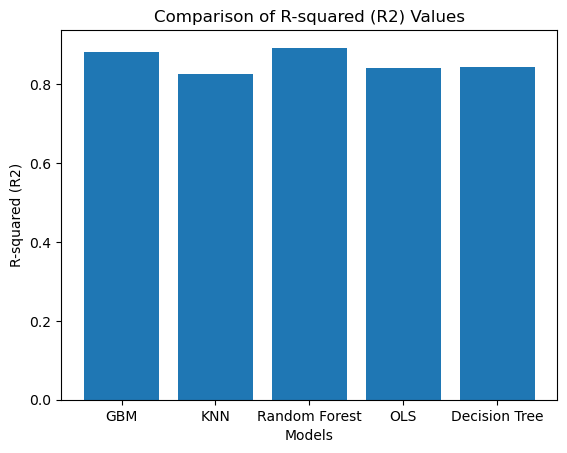

In [1507]:
import matplotlib.pyplot as plt
models = ['GBM', 'KNN', 'Random Forest', 'OLS','Decision Tree']
r2_values = [0.88, 0.825, 0.892, 0.841,0.844]
plt.bar(models, r2_values)
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) Values')
plt.show()

From the above comparision chart we can conclude that the Random Forest gives the result and we can get the Idea which are features 
most influencial to predict the outcome,From the random forest RMSE came 0.20 that means with difference of actual values,for an example 
if we consider laptop prices are in dollar that means difference of 20 dollar with the actual values of from the predicted values. 

Ram,Type_Notebook,Intel Processor is the top most influencial feature for laptop price.

Q1-Ans-absBy accurately predicting laptop prices, businesses can determine the optimal price point that maximizes profitability and sales

Q2-Ans-Ram is the top most influencial feature for laptop price apart from these there are also few factors which influence the pricing.

Q3-Ans-Accurate predictions help optimize pricing strategies, understand the price elasticity of demand, assess the impact of price changes, and gain a competitive edge in the market